### Example with Recurrent Neural Networks - IMDB dataset

Load and pre-process the dataset

In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Define and train the RNN model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Input

model = Sequential()
model.add(Input((maxlen,)))
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - acc: 0.6061 - loss: 0.6475 - val_acc: 0.7848 - val_loss: 0.4735
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - acc: 0.8206 - loss: 0.4199 - val_acc: 0.8238 - val_loss: 0.4000
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - acc: 0.8703 - loss: 0.3188 - val_acc: 0.7808 - val_loss: 0.4685
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - acc: 0.8902 - loss: 0.2852 - val_acc: 0.8490 - val_loss: 0.3498
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - acc: 0.9095 - loss: 0.2290 - val_acc: 0.7598 - val_loss: 0.5161
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.9354 - loss: 0.1791 - val_acc: 0.7706 - val_loss: 0.5364
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - acc: 0.9557 - loss: 0.1286 - val_acc: 0.8580 - val_loss: 0.4028
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - acc: 0.9746 - loss: 0.0830 - val_acc: 0.8110 - val_loss: 0.5332
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 6

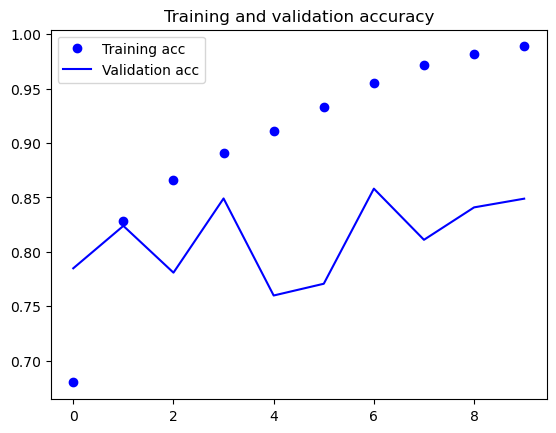

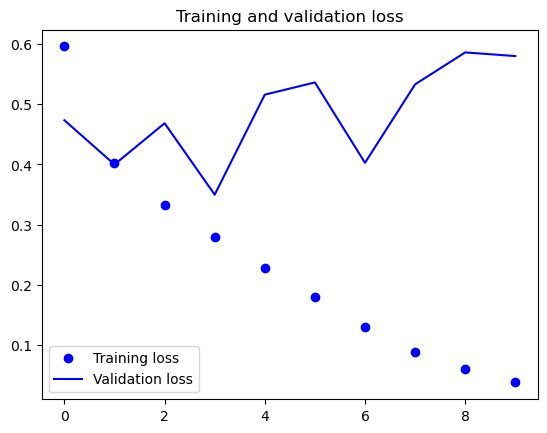

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [15]:
results = model.evaluate(input_test, y_test, verbose = 0)
print(results)

[0.600350022315979, 0.8438799977302551]


RNN model with multiple layers

In [18]:
model2 = Sequential()
model2.add(Embedding(max_features, 32))
model2.add(SimpleRNN(32, return_sequences = True))
model2.add(SimpleRNN(32, return_sequences = True))
model2.add(SimpleRNN(32))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 158ms/step - acc: 0.5196 - loss: 0.6972 - val_acc: 0.5578 - val_loss: 0.6784
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - acc: 0.6698 - loss: 0.6009 - val_acc: 0.7412 - val_loss: 0.5180
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - acc: 0.8427 - loss: 0.3650 - val_acc: 0.7472 - val_loss: 0.5223
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 152ms/step - acc: 0.9326 - loss: 0.1855 - val_acc: 0.7758 - val_loss: 0.5706
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - acc: 0.9737 - loss: 0.0800 - val_acc: 0.7814 - val_loss: 0.7033
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 168ms/step - acc: 0.9896 - loss: 0.0336 - val_acc: 0.7934 - val_loss: 0.8376
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - acc: 0.9948 - loss: 0.0158 - val_acc: 0.6948 - val_loss: 1.3922
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - acc: 0.9976 - loss: 0.0078 - val_acc: 0.7822 - val_loss: 1.1487
Epoch 9/10
157/157 ━━━━━━━━━━━━━

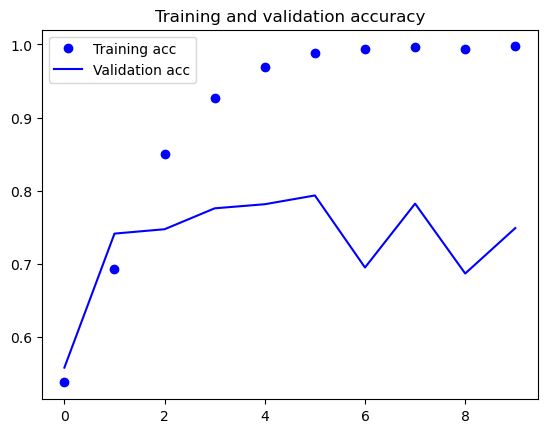

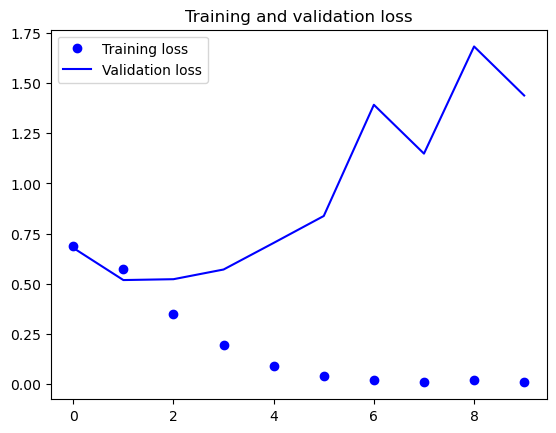

In [20]:
import matplotlib.pyplot as plt

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
results = model2.evaluate(input_test, y_test, verbose = 0)
print(results)

[1.4639073610305786, 0.7396000027656555]
